In [2]:
import pandas as pd
import talib as ta
import numpy as np
import matplotlib.pyplot as plt
from eval_algo import eval_actions

In [3]:
## Loading the Data

# Read the training and testing data from CSV files
train_df = pd.read_csv('train_data_50.csv') # TODO: make sure that the train_data.csv file is in the same directory as this!

# change date into datetime objects
train_df['Date'] = pd.to_datetime(train_df['Date'])

# set indexes 
train_df.set_index(["Ticker", "Date"], inplace=True)

print(train_df)

                        Open       High        Low      Close  Adj Close  \
Ticker Date                                                                
ZJ     2015-07-06   5.699535   5.758382   5.695429   5.747890   5.193889   
       2015-07-07   5.742872   5.754733   5.646161   5.733748   5.181111   
       2015-07-08   5.678550   5.685849   5.590051   5.591420   5.052501   
       2015-07-09   5.649811   5.659391   5.438599   5.477374   4.949447   
       2015-07-10   5.562680   5.649811   5.529379   5.623808   5.081768   
...                      ...        ...        ...        ...        ...   
ZA     2021-04-05  10.455685  10.459335  10.244017  10.309707   9.270878   
       2021-04-06  10.371748  10.499479  10.265913  10.280512   9.244624   
       2021-04-07  10.289635  10.358975  10.262265  10.326130   9.285647   
       2021-04-08  10.205698  10.233069  10.094389  10.218471   9.188834   
       2021-04-09  10.218471  10.298759  10.132709  10.194749   9.167504   

           

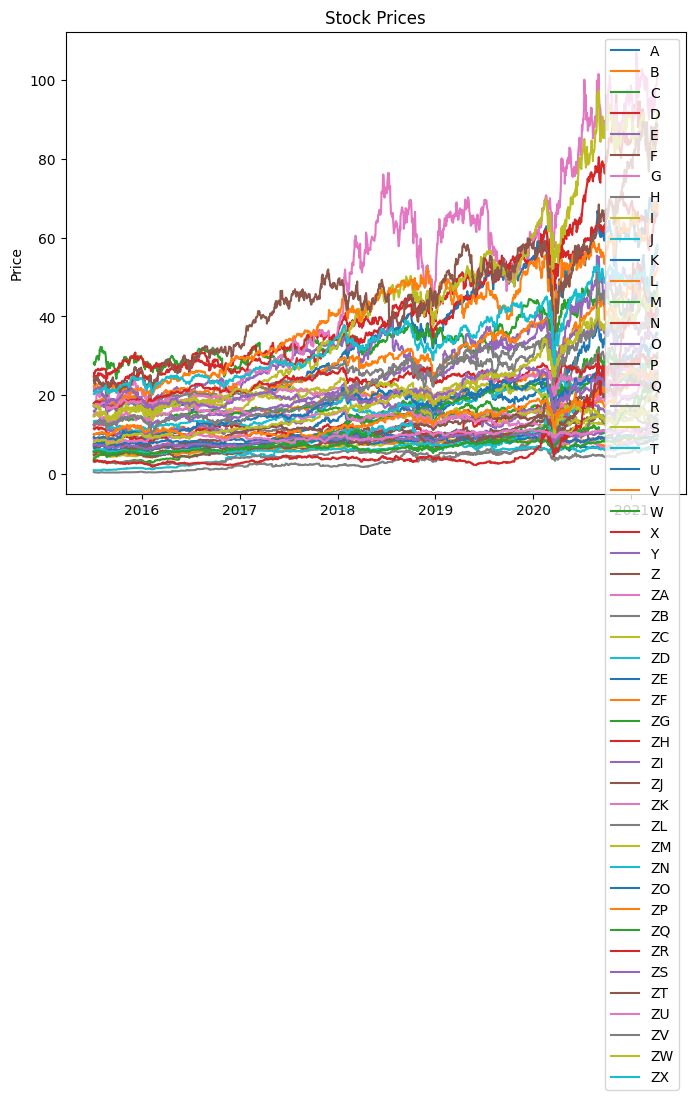

In [4]:
# We can plot all the symbols like below
import matplotlib.pyplot as plt

tickers = sorted(train_df.index.get_level_values('Ticker').unique())

plt.figure(figsize=(8, 6))

for ticker in tickers:
    stock_close_data = train_df.loc[ticker]["Close"]
    plt.plot(stock_close_data.index,stock_close_data.values, label=f'{ticker}')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Prices')
plt.legend()
plt.show()

In [5]:
import numpy as np

tickers = sorted(train_df.index.get_level_values('Ticker').unique())

open_prices = []
close_prices =[]
high_prices = []
low_prices = []
adj_close_prices = []
volume = []


for ticker in tickers:
    # getting data for ta-lib indicators
    stock_open_data = train_df.loc[ticker]["Open"]
    open_prices.append(stock_open_data.values)

    stock_close_data = train_df.loc[ticker]["Close"]
    close_prices.append(stock_close_data.values)

    stock_high_data = train_df.loc[ticker]["High"]
    high_prices.append(stock_high_data.values)

    stock_low_data = train_df.loc[ticker]["Low"]
    low_prices.append(stock_low_data.values)

    stock_adj_close_data = train_df.loc[ticker]["Adj Close"]
    adj_close_prices.append(stock_adj_close_data.values)

    stock_volume_data = train_df.loc[ticker]["Volume"]
    volume.append(stock_volume_data.values)



open_prices = np.stack(open_prices)
close_prices = np.stack(close_prices)
high_prices = np.stack(high_prices)
low_prices = np.stack(low_prices)
adj_close_prices = np.stack(adj_close_prices)
volume = np.double(np.stack(volume))
print(((open_prices.shape == close_prices.shape)==(low_prices.shape == high_prices.shape))==(adj_close_prices.shape == volume.shape))
print(open_prices, close_prices, high_prices, low_prices, adj_close_prices, volume)





True
[[17.04294995 17.25096871 16.96448663 ... 67.35797313 68.06231506
  68.62432851]
 [12.20377331 12.24209241 12.04319784 ... 27.93657064 28.10079496
  28.43107009]
 [27.76139563 28.32888582 28.12086706 ... 45.28424827 45.45394932
  45.20031238]
 ...
 [12.73111928 12.80593376 12.77856257 ... 40.5016405  40.69141088
  40.9340999 ]
 [ 8.02149948  8.0908393   8.10908629 ... 45.21855798 46.12362377
  46.14186937]
 [20.12126341 20.38584965 20.38584965 ... 57.08475709 57.0592138
  57.54641278]] [[17.24731847 17.13236118 16.87689913 ... 67.71196503 68.92723385
  69.35421928]
 [12.28588686 12.18917655 11.93918846 ... 28.27049323 28.30516348
  28.51683248]
 [28.1920313  28.35443189 27.79241566 ... 45.27512407 45.04885971
  45.42657674]
 ...
 [12.61981222 12.82053191 12.66178016 ... 40.288145   40.95599573
  42.20228457]
 [ 8.0999628   8.08354023  8.07259231 ... 45.59992525 46.21120989
  46.68564001]
 [20.3128603  20.50993114 20.25446909 ... 57.01724308 57.374888
  58.25076028]] [[17.27651477 

In [6]:
trades = np.zeros_like(open_prices)
trades


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
def sumpos(l1):
    count = 0
    for i in range(len(l1)):
        count+= l1[i] * close_prices[i][len(open_prices[0])-1] 
    return count
        

In [11]:
#goofy ass rsi thing but not following trading theory at all
moneys = 25000
for stock in range(len(open_prices)): 
    num_stock = 0
    #TODO add whatever indicator calcs
    rsi = ta.RSI(open_prices[stock], timeperiod=14)
    for day in range(1, len(open_prices[0])-1):
        buy_condition = (rsi[day]>=70)
        sell_condition = (rsi[day]<=30)


        if(sell_condition and num_stock > 0):   #some sell type shi
            trades[stock][day] = -1
            num_stock-=1
            moneys = moneys + open_prices[stock][day]

        elif(buy_condition and moneys > open_prices[stock][day]):     #some buy type shit
            trades[stock][day] = 1
            num_stock+=1
            moneys = moneys - open_prices[stock][day]

        else:
            trades[stock][day] = 0

In [20]:
#rsi thing with shorting -> lost so much lmaoooooooooo
moneys = 25000
debt = 0
long_pos = []
for stock in range(len(open_prices)): 
    num_stock = 0
    #TODO add whatever indicator calcs
    rsi = ta.RSI(open_prices[stock], timeperiod=14)
    for day in range(1, len(open_prices[0])-1):
        buy_condition = (rsi[day]<=30)
        sell_condition = (rsi[day]>=70)


        if(sell_condition and num_stock > 0):   #some sell type shi
            trades[stock][day] = -1
            num_stock-=1
            moneys = moneys + open_prices[stock][day]

        elif(buy_condition and moneys > open_prices[stock][day]):     #some buy type shit
            if (num_stock > 0):
                trades[stock][day+1] = -1
                num_stock-=1
                moneys = moneys + open_prices[stock][day+1]
            elif(moneys + num_stock*open_prices[stock][day]+sumpos(long_pos)>(debt + open_prices[stock][day+1])):
                trades[stock][day+1] = -1
                debt += open_prices[stock][day+1]

        else:
            trades[stock][day] = 0

In [24]:
#goofy ass obv adl & sma  type shi w/out shorting-> sharpe: 0.68
moneys = 25000
for stock in range(len(open_prices)): 
    num_stock = 0
    #TODO add whatever indicator calcs
    sma_vol = ta.SMA(volume[stock],timeperiod=60)
    sma = ta.SMA(close_prices[stock],timeperiod=60)
    sma_65 = ta.SMA(close_prices[stock],timeperiod=65)
    sma_20 = ta.SMA(close_prices[stock],timeperiod=20)
    adl = ta.AD(high_prices[stock],low_prices[stock],close_prices[stock],volume[stock])
    obv = ta.OBV(close_prices[stock], volume[stock])


    for day in range(1, len(open_prices[0])-1):

        if((sma_vol[day]>10000) and (sma[day]>10) and (open_prices[stock][day]< sma_65[day]) and (open_prices[stock][day]< sma_20[day]) and (adl[day]>sma_20[day]) and (obv[day] > sma_65[day]) and (moneys > open_prices[stock][day+1])):     #some buy type shit
            trades[stock][day+1] = 1
            num_stock+=1
            moneys = moneys - open_prices[stock][day+1]
            
        elif((sma_vol[day]>10000) and (sma[day]>10) and (open_prices[stock][day] > sma_65[day]) and (open_prices[stock][day] > sma_20[day]) and (adl[day] < sma_20[day]) and (obv[day] < sma_65[day]) and num_stock > 0):   #some sell type shi
            trades[stock][day+1] = -1
            num_stock-=1
            moneys = moneys + open_prices[stock][day+1]

        else:
            trades[stock][day+1] = 0

In [22]:
#shorting type shi obv & adl & sma -> performes ass



moneys = 25000
debt = 0
long_pos = []
for stock in range(len(open_prices)): 
    num_stock = 0
    #TODO add whatever indicator calcs
    sma_vol = ta.SMA(volume[stock],timeperiod=60)
    sma = ta.SMA(close_prices[stock],timeperiod=60)
    sma_65 = ta.SMA(close_prices[stock],timeperiod=65)
    sma_20 = ta.SMA(close_prices[stock],timeperiod=20)
    adl = ta.AD(high_prices[stock],low_prices[stock],close_prices[stock],volume[stock])
    obv = ta.OBV(close_prices[stock], volume[stock])


    for day in range(1, len(open_prices[0])-1):
        #buy
        if((sma_vol[day]>10000) and (sma[day]>10) and (open_prices[stock][day]< sma_65[day]) and (open_prices[stock][day]< sma_20[day]) and (adl[day]>sma_20[day]) and (obv[day] > sma_65[day]) and (moneys > open_prices[stock][day+1])):     #some buy type shit
            trades[stock][day+1] = 1
            num_stock+=1
            moneys = moneys - open_prices[stock][day+1]
            
        #sell or short
        elif((sma_vol[day]>10000) and (sma[day]>10) and (open_prices[stock][day] > sma_65[day]) and (open_prices[stock][day] > sma_20[day]) and (adl[day] < sma_20[day]) and (obv[day] < sma_65[day])):   #some sell type shi
            if (num_stock > 0):
                trades[stock][day+1] = -1
                num_stock-=1
                moneys = moneys + open_prices[stock][day+1]
            elif(moneys + num_stock*open_prices[stock][day]+sumpos(long_pos)>(debt + open_prices[stock][day+1])):
                trades[stock][day+1] = -1
                debt += open_prices[stock][day+1]
            
        


        else:
            trades[stock][day+1] = 0
    long_pos.append(num_stock)

In [69]:
#trading just of adl without shorting
moneys = 25000
debt = 0
long_pos = []
for stock in range(len(open_prices)): 
    num_stock = 0
    #TODO add whatever indicator calcs
    sma_vol = ta.SMA(volume[stock],timeperiod=60)
    sma = ta.SMA(close_prices[stock],timeperiod=60)
    sma_65 = ta.SMA(close_prices[stock],timeperiod=65)
    sma_20 = ta.SMA(close_prices[stock],timeperiod=20)
    adl = ta.AD(high_prices[stock],low_prices[stock],close_prices[stock],volume[stock])
    obv = ta.OBV(close_prices[stock], volume[stock])


    for day in range(1, len(open_prices[0])-1):
        #buy
        if((sma_20[day]>sma_65[day]) and (moneys > open_prices[stock][day+1])):     #some buy type shit
            trades[stock][day+1] = 1
            num_stock+=1
            moneys = moneys - open_prices[stock][day+1]
            
        #sell or short
        elif((sma_20[day]< sma_65[day]) and num_stock > 0):   #some sell type shi
            trades[stock][day+1] = -1
            num_stock-=1
            moneys = moneys + open_prices[stock][day+1]

        else:
            trades[stock][day+1] = 0
    long_pos.append(num_stock)

In [71]:
from eval_algo import eval_actions

portfolio_value, sharpe_ratio = eval_actions(trades, open_prices, cash=25000, verbose=True)
print(f"\nPortfolio value: {portfolio_value}")
print(f"Sharpe ratio: {sharpe_ratio}")

INVALID CASH AMOUNT, COULD NOT AFFORD TRANSACTION

Portfolio value: 0
Sharpe ratio: 0
